# Python Assignment 2

- Name: Chai Pin Zheng

- Admission No: P2026338

- Teacher: Wilson Qiu ZiXuan

- Class: EL/EP0302/FT/02

## Introduction
In this report, I'll be using 4 government datasets to analyze if a more educated population is causative to a more productive and profitable economy?
- government-expenditure-on-education.csv, https://data.gov.sg/dataset/government-expenditure-on-education
- Percentage of P1 Cohort that Progressed to Post-Secondary Education, https://data.gov.sg/dataset/percentage-of-p1-cohort-admitted-to-post-secondary-education
- Literacy Rate, Annual, https://data.gov.sg/dataset/literacy-rate-annual
- per-capita-gni-and-per-capita-gdp-at-current-prices-annual.csv, https://data.gov.sg/dataset/per-capita-gni-and-per-capita-gdp-at-current-market-prices-annual

---
But, before I began working on these datasets, I wanted to learn more about how and what Singapore economy was transformed and the effects of it. With independence came bleak, if not precarious economic prospects. According to Barbara Leitch Lepoer, the editor of Singapore: A Country Study (1989): “Separation from Malaysia meant the loss of Singapore’s economic hinterland, and Indonesia’s policy of military confrontation directed at Singapore and Malaysia had dried up the entrepot from that direction.” According to the same book, Singapore also faced the loss of 20 per cent of its jobs with the announcement of Britain’s departure from the island’s military bases in 1968.

Instead of demoralising Singapore, these problems motivated Singapore’s leadership to focus on the nation’s economy. With Cambridge-educated lawyer Lee Kuan Yew at its helm, the Singaporean government was aggressive in promoting export-oriented, labor-extensive industrialisation through a program of incentives to attract foreign investment. After all, Singapore still had its strategic location to its advantage.

By late 1970s, the government changed its strategic focus to skill and technology-intensive, high value-added industries and away from labor-intensive manufacturing. In particular, information technology was given priority for expansion and Singapore became the world’s largest producer of disk drives and disk drive parts in 1989. In the same year, 30 per cent of the country’s GDP was due to earnings from manufacturing.

Singapore’s international and financial services sector was and still is one of the fastest growing sectors of its economy accounting for nearly 25 per cent of the country’s GDP in the late 1980s. In the same year, Singapore ranked alongside Hong Kong as the two most important Asian financial centers after Tokyo. By 1990, Singapore was playing host to more than 650 multinational companies and several thousand financial institutions and trading firms. On the political front, Goh Chok Tong succeeded Lee Kuan Yew in 1990 and in 2004, Lee Hsien Loong, the eldest son of Lee Kuan Yew, became Singapore’s third prime minister.


![black-divider](https://www.belaroundtheworld.com/wp-content/uploads/2017/08/singapore-river-old-vs-new.jpg)

As such, the many questions were raised. How did Singapore managed to overturn its economy in less than a century? What caused Singapore to be so successful and join the Asian Tigers? What were the factors that came into play? But more importantly, has these success benefit the population of Singapore and the consequences of it?

As a result, in this journal report, we will investigate the datasets to fully understand Singapore birth rates and its consequences of it.

## Import relevant Libraries

---

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display, Markdown, Latex
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

ModuleNotFoundError: No module named 'statsmodels'

## Reading the Data

---

As all of the data files are in `.csv` format, I will import the data using the 'Numpy.genfromtxt' method.

In [2]:
# government-expenditure-on-education
government_expenditure_on_education = pd.read_csv('./data/government-expenditure-on-education.csv', sep=",", na_values=['na'])
# percentage-of-p1-cohort-that-progressed-to-post-secondary-education
percentage_of_p1_cohort_that_progressed_to_post_secondary_education = pd.read_csv('./data/percentage-of-p1-cohort-that-progressed-to-post-secondary-education.csv', sep=",", na_values=['na'])
# literacy-rate-annual
literacy_rate_annual = pd.read_csv('./data/literacy-rate-annual.csv', sep=",", na_values=['na'])
# per-capita-gni-and-per-capita-gdp-at-current-prices-annual
per_capita_gni_and_per_capita_gdp_at_current_prices_annual = pd.read_csv('./data/per-capita-gni-and-per-capita-gdp-at-current-prices-annual.csv', sep=",", na_values=['na'])

## Cleaning the data + text-based analysis

---

We will drop any rows that have fields that contain `empty` values. This is to ensure that when plotting, there will be no major issues

### government-expenditure-on-education.csv

- Cleaning of "government-expenditure-on-education.csv"
 
 ---

In [3]:
government_expenditure_on_education_cleaned = government_expenditure_on_education
government_expenditure_on_education_cleaned['year'] = pd.to_datetime(government_expenditure_on_education_cleaned['year'], format='%Y')
government_expenditure_on_education_cleaned = government_expenditure_on_education_cleaned.set_index('year')

 - Analysis of "government-expenditure-on-education.csv"
 
 ---

In [4]:
year = government_expenditure_on_education_cleaned.index
column = government_expenditure_on_education_cleaned.columns
total_rows = government_expenditure_on_education_cleaned['recurrent_expenditure_total'].count() + 1

display(Markdown(f'''
***Within this .csv:***
---  
---
- There are exactly {total_rows} rows, {len(column) + 1} columns in this dataset.
- There are {len(year)} years of data captured from **{year[0]}** to **{year[-1]}**


***Within the {len(column) + 1} columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| {government_expenditure_on_education_cleaned.index.name} | {government_expenditure_on_education_cleaned.index.dtype} |
| {government_expenditure_on_education_cleaned.columns[0]} | {government_expenditure_on_education_cleaned[government_expenditure_on_education_cleaned.columns[0]].dtype} |


***Descriptive Statistics (cleaned):***
---
---
'''), government_expenditure_on_education_cleaned.describe(include="all").T.style.highlight_max(color='#CA472F', axis=1).highlight_min(color='#0B84A5', axis=1))



***Within this .csv:***
---  
---
- There are exactly 40 rows, 2 columns in this dataset.
- There are 39 years of data captured from **1981-01-01 00:00:00** to **2019-01-01 00:00:00**


***Within the 2 columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| year | datetime64[ns] |
| recurrent_expenditure_total | int64 |


***Descriptive Statistics (cleaned):***
---
---


,count,mean,std,min,25%,50%,75%,max
recurrent_expenditure_total,39.000000,5239350.153846,3867411.749561,712732.000000,1918850.000000,4276896.000000,8418309.000000,12429006.000000


### percentage-of-p1-cohort-that-progressed-to-post-secondary-education.csv

- Cleaning of "percentage-of-p1-cohort-that-progressed-to-post-secondary-education.csv"

---

In [5]:
percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned = percentage_of_p1_cohort_that_progressed_to_post_secondary_education
# percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['year'] = pd.to_datetime(percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['year'], format='%Y')

- Analysis of "percentage-of-p1-cohort-that-progressed-to-post-secondary-education.csv"

---

In [6]:
years = percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['year']
column = percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned.columns
total_rows = percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['race'].count()

display(Markdown(f'''
***Within this .csv:***
---  
---
- There are exactly {total_rows} rows, {len(column)} columns in this dataset.
- There are {len(np.unique(years))} years of data captured from **{percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['year'].iloc[0:1][0]}** to **{percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['year'].iloc[-1]}**


***Within the {len(column)} columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| {percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned.columns[0]} | {percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned[percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned.columns[0]].dtype} |
| {percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned.columns[1]} | {percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned[percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned.columns[1]].dtype} |
| {percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned.columns[2]} | {percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned[percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned.columns[2]].dtype} |



***Descriptive Statistics (cleaned):***
---
---
'''), percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned.describe(include="all", datetime_is_numeric=True).T.style.highlight_max(color='#CA472F', axis=1).highlight_min(color='#0B84A5', axis=1))


***Within this .csv:***
---  
---
- There are exactly 125 rows, 3 columns in this dataset.
- There are 25 years of data captured from **1995** to **2019**


***Within the 3 columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| year | int64 |
| race | object |
| percentage_p1_cohort_post_sec | float64 |



***Descriptive Statistics (cleaned):***
---
---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,125.000000,nan,nan,nan,2007.000000,7.240121,1995.000000,2001.000000,2007.000000,2013.000000,2019.000000
race,125,5,Chinese,25,nan,nan,nan,nan,nan,nan,nan
percentage_p1_cohort_post_sec,120.000000,nan,nan,nan,86.040000,11.483510,45.100000,81.525000,90.650000,93.600000,98.000000


### literacy-rate-annual.csv

- Cleaning of "literacy-rate-annual.csv"

---

In [7]:
literacy_rate_annual_cleaned = literacy_rate_annual
literacy_rate_annual_cleaned = literacy_rate_annual_cleaned.dropna()

- Analysis of "literacy-rate-annual.csv"

---

In [8]:
years = literacy_rate_annual_cleaned['year']
column = literacy_rate_annual_cleaned.columns
total_rows = literacy_rate_annual_cleaned['value'].count()

display(Markdown(f'''
***Within this .csv:***
---  
---
- There are exactly {total_rows} rows, {len(column)} columns in this dataset.
- There are {len(np.unique(years))} years of data captured from **{years.iloc[0]}** to **{years.iloc[-1]}**


***Within the {len(column)} columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| {literacy_rate_annual_cleaned.columns[0]} | {literacy_rate_annual_cleaned[literacy_rate_annual_cleaned.columns[0]].dtype} |
| {literacy_rate_annual_cleaned.columns[1]} | {literacy_rate_annual_cleaned[literacy_rate_annual_cleaned.columns[1]].dtype} |
| {literacy_rate_annual_cleaned.columns[2]} | {literacy_rate_annual_cleaned[literacy_rate_annual_cleaned.columns[2]].dtype} |


***Descriptive Statistics (cleaned):***
---
---
'''), literacy_rate_annual_cleaned.describe(include="all").T.style.highlight_max(color='#CA472F', axis=1).highlight_min(color='#0B84A5', axis=1))


***Within this .csv:***
---  
---
- There are exactly 60 rows, 3 columns in this dataset.
- There are 60 years of data captured from **1960** to **2019**


***Within the 3 columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| year | int64 |
| level_1 | object |
| value | float64 |


***Descriptive Statistics (cleaned):***
---
---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
year,60.000000,nan,nan,nan,1989.500000,17.464249,1960.000000,1974.750000,1989.500000,2004.250000,2019.000000
level_1,60,1,Literacy Rate (15 Years & Over),60,nan,nan,nan,nan,nan,nan,nan
value,60.000000,nan,nan,nan,83.596667,13.209049,52.600000,75.800000,88.750000,93.875000,97.500000


### per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.csv

- Cleaning of "per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.csv"

---

In [9]:
per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned = per_capita_gni_and_per_capita_gdp_at_current_prices_annual
per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.set_index('year', inplace=True)
per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned = per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.pivot(columns='level_1', values='value', index=None)

- Analysis of "per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.csv"

---

In [10]:
column = per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.columns
total_rows = per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned['Per Capita GDP'].count() + 1
per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned_years = per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.index

display(Markdown(f'''
***Within this .csv:***
---  
---
- There are exactly {total_rows} rows, {len(column) + 1} columns in this dataset.
- There are {len(np.unique(per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned_years))} years of data captured from **{per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned_years[0]}** to **{per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned_years[-1]}**


***Within the {len(column) + 1} columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.index.name} | {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.index.dtype} |
| {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.columns[0]} | {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned[per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.columns[0]].dtype} |
| {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.columns[1]} | {per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned[per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.columns[1]].dtype} |


***Descriptive Statistics (cleaned):***
---
---
'''), per_capita_gni_and_per_capita_gdp_at_current_prices_annual_cleaned.describe(include="all").T.style.highlight_max(color='#CA472F', axis=1).highlight_min(color='#0B84A5', axis=1))



***Within this .csv:***
---  
---
- There are exactly 60 rows, 3 columns in this dataset.
- There are 59 years of data captured from **1960** to **2018**


***Within the 3 columns, the datatypes are:***
---
---
| Column | Date Type |
| --- | --- |
| year | int64 |
| Per Capita GDP | int64 |
| Per Capita GNI | int64 |


***Descriptive Statistics (cleaned):***
---
---


,count,mean,std,min,25%,50%,75%,max
level_1,,,,,,,,
Per Capita GDP,59.000000,28841.966102,25858.062993,1310.000000,5911.500000,20918.000000,44003.500000,87108.000000
Per Capita GNI,59.000000,27936.830508,24546.909332,1334.000000,5859.500000,20791.000000,42355.500000,81222.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Plotting the Data

---

All of the data will be plotted using matplotlib and seaborn for visualisation

# Since our thesis statement is finding if a more educated population is causative to a more productive and profitable economy, we first need to find out the government initatives to cultivate an educated population.

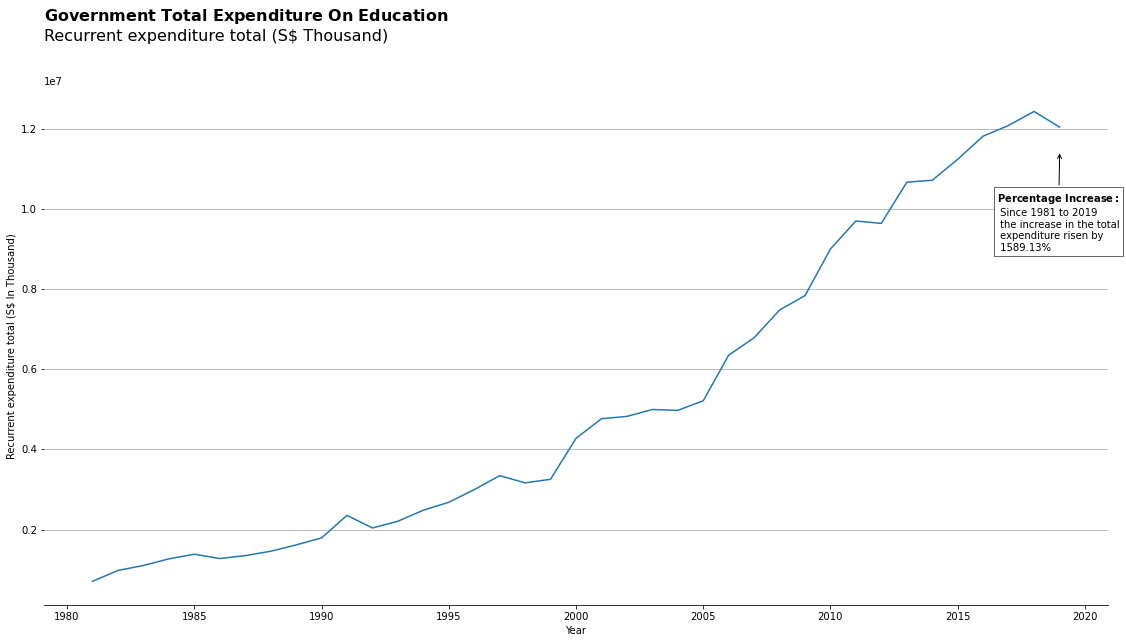

In [11]:
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)

# Pre-processing the data
x = government_expenditure_on_education_cleaned.index
y = government_expenditure_on_education_cleaned['recurrent_expenditure_total']
data = pd.DataFrame([x, y])
percentage_change = ((government_expenditure_on_education_cleaned['recurrent_expenditure_total'].iloc[-1] - government_expenditure_on_education_cleaned['recurrent_expenditure_total'].iloc[0]) / ( government_expenditure_on_education_cleaned['recurrent_expenditure_total'].iloc[0])) * 100

# Configuration
bbox = {
    "boxstyle": "square,pad=0.3",
    "fc": "white",
    "ec": "dimgrey"
}

# Plotting
sns.lineplot(data=government_expenditure_on_education_cleaned, x="year", y="recurrent_expenditure_total", ax=ax)
sns.despine(left=True)

ax.set_title(r"$\bf{Government\ Total\ Expenditure\ On\ Education}$" + "\nRecurrent expenditure total (S$ Thousand)", loc="left", fontsize=16, y=1.08)
ax.set_xlabel("Year")
ax.set_ylabel("Recurrent expenditure total (S$ In Thousand)")
ax.grid(True, axis="y")

ax.annotate(r"$\bf{Percentage\ Increase:}$" + f'\n Since 1981 to 2019\n the increase in the total\n expenditure risen by\n {percentage_change:.2f}%', xy=(15500 +
                                                                                                                                                          2400, 4477097 + 4477097 + 2477097), xytext=(16000 + 1000, 4477097 + 4477097), arrowprops=dict(color='black', arrowstyle="->"), xycoords="data", bbox=bbox)
plt.show()

### Insights
- The government total expenditure on education has generally seen a positive upward trend.
- The relative percentage of increase of the government total expenditure on education from the origin (1981) till 2019 increased by 15.89%
- This can be attributed to the various government initiaives to make quality education across all levels more accessible and affordable. Many of these measures are focused on helping students from lower-income families, putting them on a more equal footing with other students from higher-income backgrounds. These initiatives aim to allow students a more level playing field regardless of background.

### So why is this important
---
- Hence from this, we can see that the government has placed a great emphasis to improve the level of education in Singapore.

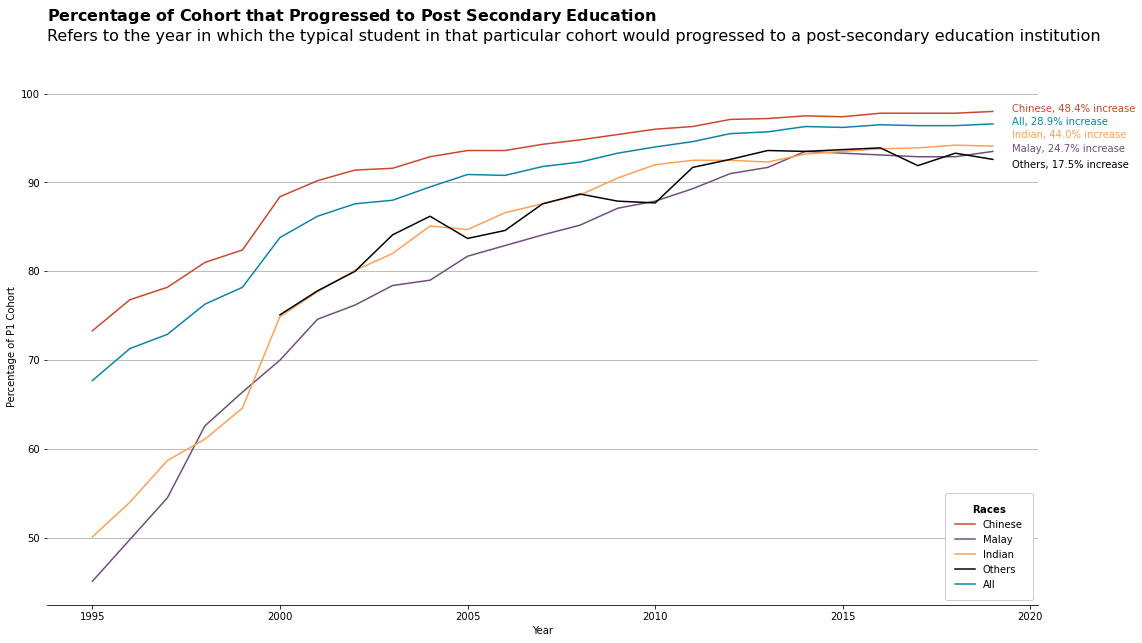

In [12]:
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)

# Pre-processing the data
percentage_change = []
year = percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['year'].unique()
temporaryDF = percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned

for item in temporaryDF['race'].unique():
    origin = temporaryDF[(temporaryDF['race'] == item) & (temporaryDF['year'] == 1995)]['percentage_p1_cohort_post_sec']
    current = temporaryDF[(temporaryDF['race'] == item) & (temporaryDF['year'] == 2019)]['percentage_p1_cohort_post_sec']
    change = float(current) - float(origin)
    percentage_change.append(change)
    
# Special Case
special_case_origin = float(temporaryDF[(temporaryDF['race'] == 'Others') & (temporaryDF['year'] == 2000)]['percentage_p1_cohort_post_sec'])
special_case_effect = float(temporaryDF[(temporaryDF['race'] == 'Others') & (temporaryDF['year'] == 2019)]['percentage_p1_cohort_post_sec'])
special_percentage_change = special_case_effect - special_case_origin

# Plotting
sns.lineplot(data = temporaryDF[temporaryDF['race'] == 'Chinese'], x='year', y='percentage_p1_cohort_post_sec', label='Chinese', color="#CA472F")
sns.lineplot(data = temporaryDF[temporaryDF['race'] == 'Malay'], x='year', y='percentage_p1_cohort_post_sec', label='Malay', color="#6F4E7C")
sns.lineplot(data = temporaryDF[temporaryDF['race'] == 'Indian'], x='year', y='percentage_p1_cohort_post_sec', label='Indian', color="#FFA056")
sns.lineplot(data = temporaryDF[temporaryDF['race'] == 'Others'], x='year', y='percentage_p1_cohort_post_sec', label='Others', color="black")
sns.lineplot(data = temporaryDF[temporaryDF['race'] == 'All'], x='year', y='percentage_p1_cohort_post_sec', label='All', color="#0B84A5")

# Configurations
sns.despine(left=True)
ax.grid(True, axis="y")
ax.set_title(r"$\bf{Percentage \ of \ Cohort  \ that \ Progressed \ to \ Post \ Secondary\ Education }$" + "\nRefers to the year in which the typical student in that particular cohort would progressed to a post-secondary education institution", loc="left", fontsize=16, y=1.08)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of P1 Cohort")
ax.legend(facecolor='white', framealpha=1, title=r"$\bf{Races}$", loc="lower right", borderpad=1)

# Annotations
POS = temporaryDF[(temporaryDF['year'] == 2019) & (temporaryDF['race'] == 'Chinese')]['percentage_p1_cohort_post_sec']
ax.annotate(f"Chinese, {percentage_change[0]:.1f}% increase", (2019 + 0.25, POS + 0.05), (2019 + 0.5, POS - 0.05), color='#CA472F')

POS = temporaryDF[(temporaryDF['year'] == 2019) & (temporaryDF['race'] == 'Malay')]['percentage_p1_cohort_post_sec']
ax.annotate(f"Malay, {percentage_change[1]:.1f}% increase", (2019 + 0.25, POS + 0.05), (2019 + 0.5, POS - 0.05), color="#6F4E7C")

POS = temporaryDF[(temporaryDF['year'] == 2019) & (temporaryDF['race'] == 'Indian')]['percentage_p1_cohort_post_sec']
ax.annotate(f"Indian, {percentage_change[2]:.1f}% increase", (2019 + 0.25, POS + 0.05), (2019 + 0.5, POS + 0.9), color="#FFA056")

POS = temporaryDF[(temporaryDF['year'] == 2019) & (temporaryDF['race'] == 'Others')]['percentage_p1_cohort_post_sec']
ax.annotate(f"Others, {special_percentage_change:.1f}% increase", (2019 + 0.25, POS + 0.05), (2019 + 0.5, POS - 1), color="black")

POS = temporaryDF[(temporaryDF['year'] == 2019) & (temporaryDF['race'] == 'All')]['percentage_p1_cohort_post_sec']
ax.annotate(f"All, {percentage_change[4]:.1f}% increase", (2019 + 0.25, POS + 0.05), (2019 + 0.5, POS - 0.18), color="#0B84A5")

plt.show()
# POS = position

### Insights
- Post-secondary education can be defined as progressing to tertiary education, such as Junior Colleges, polytechnics, institutes of Technical Education (ITE) and even universities.
- We can see that the percentage of the P1 Cohort that progressed to post-secondary education has experienced a positive upward trend. 
- We can see that the Chinese have the greatest increase out of all the different races 48.4%, followed by the Indians at 44.0% and Malays at 24.7%.
- The rise of more people progressing to post-secondary education can be attributed to quality education being made more affordable to the majority of the public even to the lower class. Hence, more parents are able to send their kids to school.

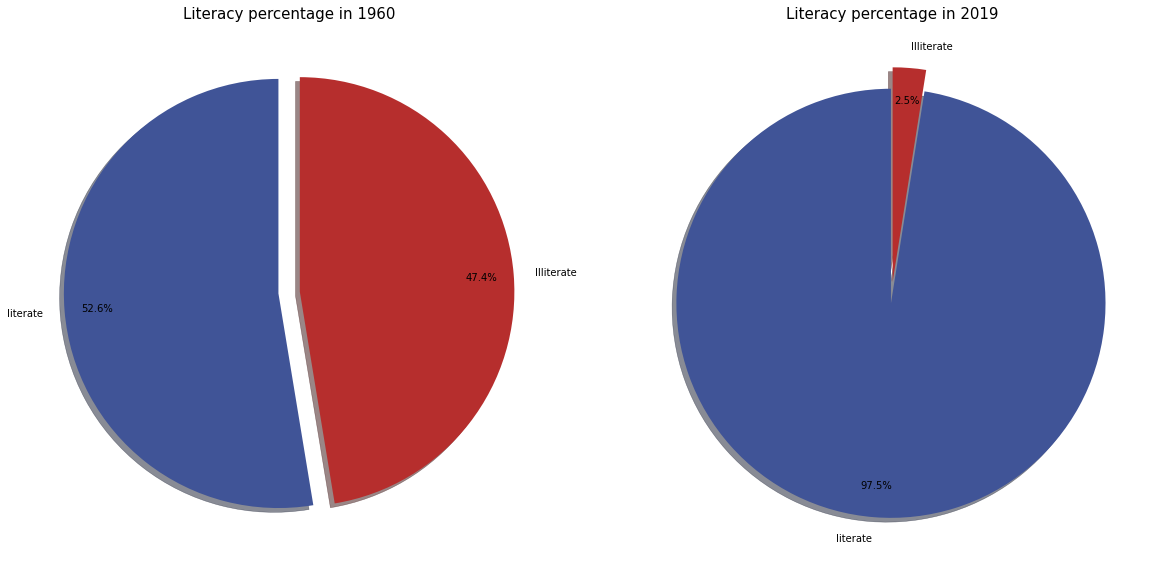

In [13]:
temporaryDF = literacy_rate_annual_cleaned

percentage_of_all_1960 = temporaryDF.iloc[0]['value']
percentage_of_all_1960_others = 100 - percentage_of_all_1960
piechart_data_1960 = [percentage_of_all_1960, percentage_of_all_1960_others]

percentage_of_all_2019 = temporaryDF.iloc[-1]['value']
percentage_of_all_2019_others = 100 - percentage_of_all_2019
piechart_data_2019 = [percentage_of_all_2019, percentage_of_all_2019_others]

# Configs
explode = (0.05, 0.05)
colors = ["#405497", "#B62E2D"]
labels = ['literate', 'Illiterate']

bbox = {
    "boxstyle": "square,pad=0.3",
    "fc": "white",
    "ec": "dimgrey"
}

wedgeprops = {'width':0.3, 'edgecolor':'black', 'lw':3}
# patches, _ = ax.pie(percentage_of_all_1960, wedgeprops=wedgeprops, startangle=90, colors=['#405497', 'white'])
# patches[1].set_zorder(0)
# patches[1].set_edgecolor('white')

# Plotting
with plt.style.context('ggplot'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (17.5, 8), tight_layout = True)
    
    ax1.pie(piechart_data_1960, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, pctdistance = 0.85, colors=colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
    ax1.set_title("Literacy percentage in 1960", fontsize=15)
    
    ax2.pie(piechart_data_2019, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, pctdistance = 0.85, colors=colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
    ax2.set_title("Literacy percentage in 2019", fontsize=15)

### Insights
- Adult literacy rate is the percentage of people ages 15 and above who can both read and write with understanding a short simple statement about their everyday life.
- So, with more people attaining higher levels of education, such as diploma and degrees, the general population is thus more educated, consequently, more skilled and literate.
- This can be observed where in the 1960, literacy rates were at 52.6%, whereas literacy rates in 2019 are at 97.5%. This shows that literacy rates show a significant increase over the years.

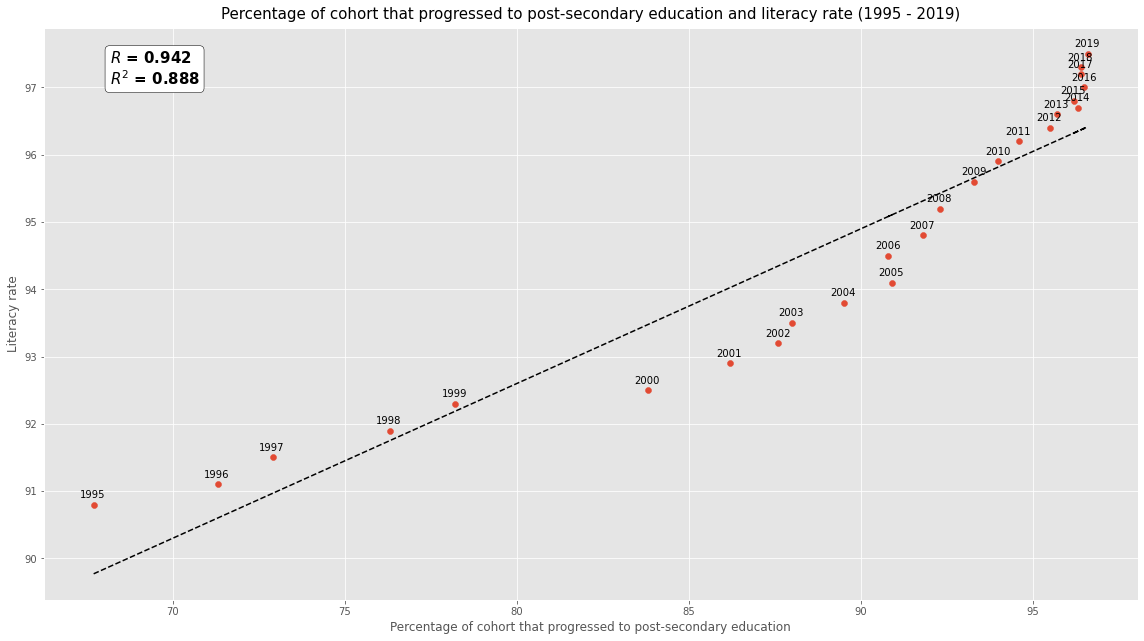

In [14]:
import math
literacy_rate_annual_temporary_df = literacy_rate_annual[(literacy_rate_annual['year'] >=1995) & (literacy_rate_annual['year'] < 2020)]
x = np.array(percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned[percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['race'] == "All"]['percentage_p1_cohort_post_sec'])
y = np.array(literacy_rate_annual_temporary_df['value'])
unique_years = literacy_rate_annual_temporary_df['year'].unique()
z = percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned[percentage_of_p1_cohort_that_progressed_to_post_secondary_education_cleaned['race'] == "All"]['percentage_p1_cohort_post_sec']
z = np.array(z)

box = {'facecolor': 'white',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }

# Polynomial Regression
def PolyRegress(x_values, y_values):
    my_fitting = np.polyfit(x_values, y_values, 1, full=True)
    coeff = my_fitting[0]

    ### Residual or Sum of Square Error (SSE)
    SSE = my_fitting[1][0]

    ### Determining the Sum of Square Total (SST)
    ## the squared differences between the observed dependent variable and its mean
    diff = y_values - y_values.mean()
    square_diff = diff ** 2
    SST = square_diff.sum()

    ###  Now getting the coefficient of determination (R2)
    R2 = 1 - SSE/SST
    return([math.sqrt(R2),R2])

with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)

    # Subplot 1
    ax.scatter(x, y)
    [R1, R2] = PolyRegress(x, y)
    ax.set_ylabel("Literacy rate")
    ax.set_xlabel("Percentage of cohort that progressed to post-secondary education")
    plt.title("Percentage of cohort that progressed to post-secondary education and literacy rate (1995 - 2019)", y=1.005, fontsize=15)
    ax.text(0.06, 0.90, f'$R$ = {R1:.3f}\n$R^2$ = {R2:.3f}', fontweight="bold", transform=ax.transAxes, backgroundcolor="white", fontdict={'weight': 'bold', 'size': 15}, bbox= box)
    
    for i, txt in enumerate(unique_years):
        ax.annotate(txt, (x[i] - 0.39, y[i] + 0.1))

    # calc the trendline (it is simply a linear fitting)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x,p(x), linestyle='--', color="black")
    plt.show()

### Insights
- As more people in the cohort progresses to post-secondary education, the literacy rates also increases. 
- This suggests that as more people are able to attain higher levels of education, the literacy rates also increases.
- Distribution is not normal and is positively skewed.

0.8 $R^2$ shows that there is a very strong correlation between the two axis.

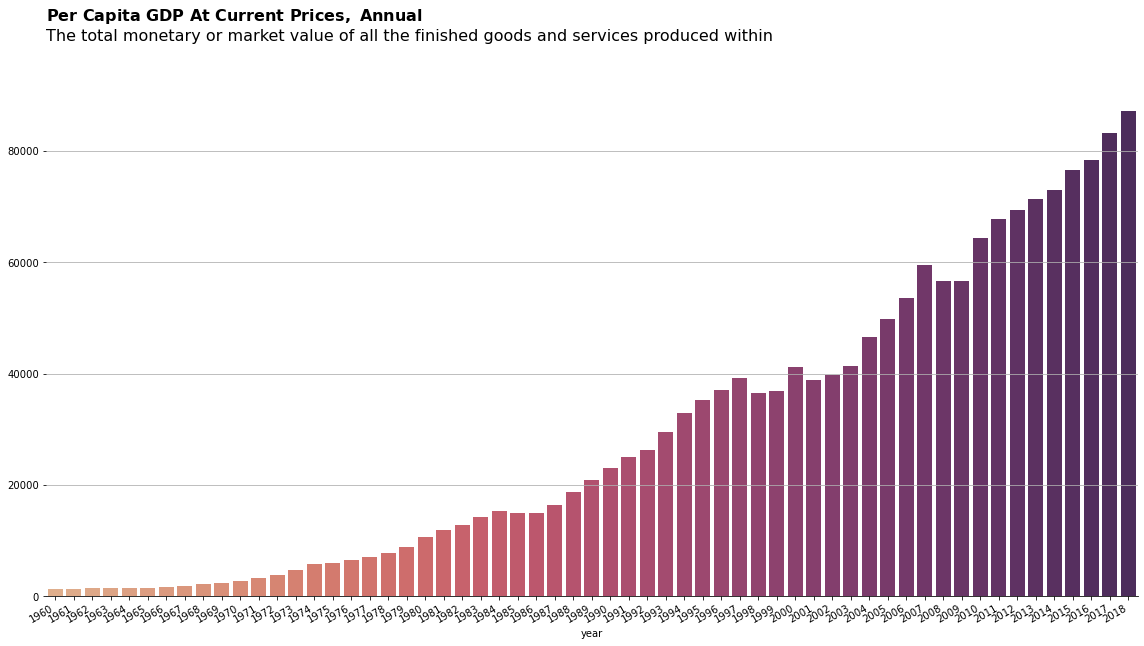

In [15]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

y = np.array(per_capita_gni_and_per_capita_gdp_at_current_prices_annual[(per_capita_gni_and_per_capita_gdp_at_current_prices_annual['level_1'] == "Per Capita GDP")]['value'])
x = np.array(per_capita_gni_and_per_capita_gdp_at_current_prices_annual.index.unique())
x = per_capita_gni_and_per_capita_gdp_at_current_prices_annual.index.unique()

# Plotting
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
ax = sns.barplot(x = x, y = y, palette= "flare", ax = ax)
sns.despine(left = True)
ax.grid(True, axis="y")  # remove vertical grid lines
ax.set_title(r"$\bf{Per \ Capita\ GDP\ At\ Current\ Prices,\ Annual  }$" + "\nThe total monetary or market value of all the finished goods and services produced within", loc="left", fontsize=16, y=1.08)

## Rotate date labels automatically
fig.autofmt_xdate()

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.show()

### Insights
- The GDP per capita seen an enormous increase. The GDP per capita at averages 1310 Singapore Dollars in 1960 whereas now the GDP per capital averages at 87108 Singapore Dollars in 2018.
- The GDP per capita has increased by 6549% since 1960 which is a tremendous amount of growth.
- This could be due to Singapore's economy being transformed into a more advanced economy. Instead of simple textile manufacturing, it has evolved to encapsulate eletronics, chemicals, biomedical sciences et cetera. Hence, these jobs are more technical and specalized, hence are more valuable. Thus this creates greater opportunities.

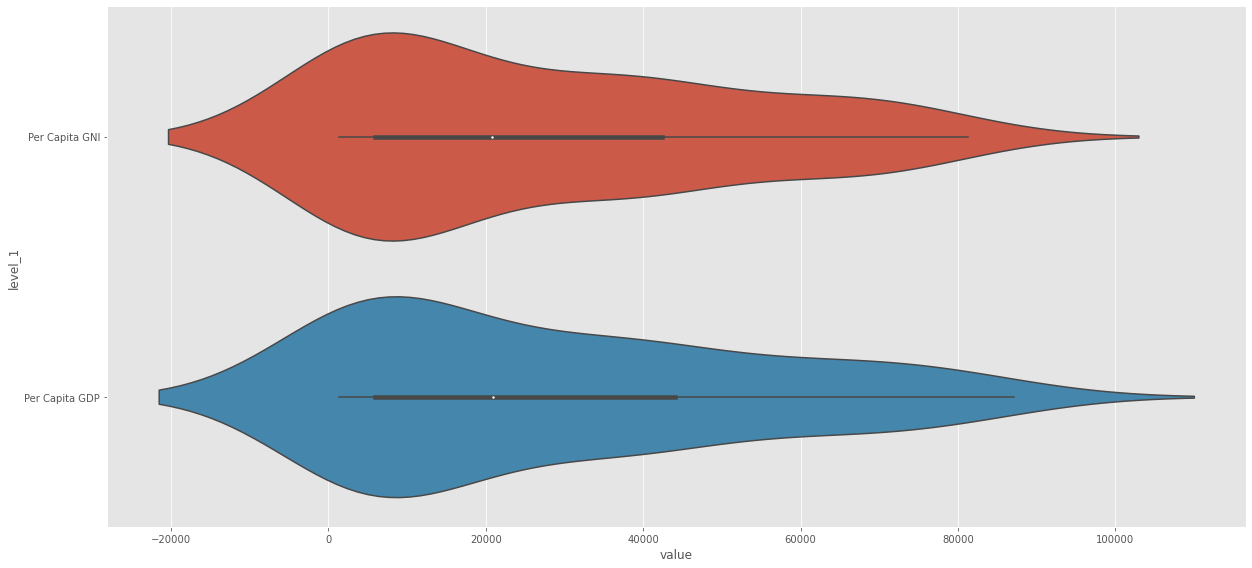

In [16]:
y1 = np.array(per_capita_gni_and_per_capita_gdp_at_current_prices_annual[(per_capita_gni_and_per_capita_gdp_at_current_prices_annual['level_1'] == "Per Capita GDP")]['value'])
y2 = np.array(per_capita_gni_and_per_capita_gdp_at_current_prices_annual[(per_capita_gni_and_per_capita_gdp_at_current_prices_annual['level_1'] == "Per Capita GNI")]['value'])

data = [y1, y2]
x = ['y','x']
with plt.style.context('ggplot'):
    # Subplot with row 1 & col 1
    fig, ax = plt.subplots(figsize=(55, 38), tight_layout=True)
    sns.violinplot(data = per_capita_gni_and_per_capita_gdp_at_current_prices_annual, y='level_1', x='value', orient="h",patch_artist = True)

- positive skewness
- long range
- no outliers